In [10]:
from sys import exit
from Crypto.Util.number import bytes_to_long, inverse, long_to_bytes
import random
import string
from pwn import *
CHARSET = string.ascii_uppercase + string.ascii_lowercase + string.digits

## **hashcrack**
Bài toán này đưa ra 03 mã băm phổ biến, nhiệm vụ của chúng ta là phải biết về 3 mã băm này, sau đó, sử dụng công cụ John the Ripper để giải mã chúng:
- 01 mã băm MD5
- 01 mã băm SHA-1
- 01 mã băm SHA-256
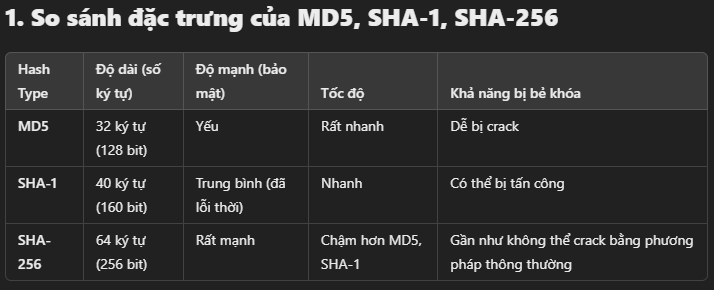

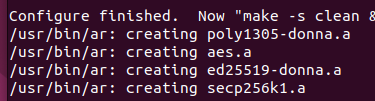

##### **Câu lệnh decode**
`john --format=raw-md5 --wordlist=/usr/share/wordlists/rockyou.txt hash256.txt`
`john --format=raw-sha1 --wordlist=/usr/share/wordlists/rockyou.txt hash256.txt`
`john --format=raw-sha256 --wordlist=/usr/share/wordlists/rockyou.txt hash256.txt`

In [22]:
port = 57819
r = remote('verbal-sleep.picoctf.net', port)

get_success = r.recvuntil('a hash: ').decode()
cypher_MD5 = r.recvline(keepends=False).strip().decode()
print(cypher_MD5)   # 482c811da5d5b4bc6d497ffa98491e38 ==> password123 khi sử dụng John

da_1 = 'password123'
get_success = r.recvuntil('identified hash: ').decode()
r.sendline(da_1)

get_success = r.recvuntil('this hash: ').decode()
sha_1 = r.recvline(keepends=False).strip().decode()
# print(sha_1)   # b7a875fc1ea228b9061041b7cec4bd3c52ab3ce3 ==> letmein
da_2 = 'letmein'
r.sendline(da_2)

get_success = r.recvuntil('Crack this hash: ').decode()
sha_256 = r.recvline(keepends=False).strip().decode()
# print(sha_256)  # 916e8c4f79b25028c9e467f1eb8eee6d6bbdff965f9928310ad30a8d88697745 ==>qwerty098
get_success = r.recvuntil('identified hash: ').decode()
da_3 = 'qwerty098'
r.sendline(da_3)

get_success = r.recvuntil('The flag is: ').decode()
flag = r.recvline(keepends=False).strip().decode()
print(flag)



[x] Opening connection to verbal-sleep.picoctf.net on port 57819
[x] Opening connection to verbal-sleep.picoctf.net on port 57819: Trying 3.138.217.147
[+] Opening connection to verbal-sleep.picoctf.net on port 57819: Done


C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:4: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil('a hash: ').decode()


482c811da5d5b4bc6d497ffa98491e38


C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:9: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil('identified hash: ').decode()
C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:10: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  r.sendline(da_1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:12: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil('this hash: ').decode()
C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:16: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  r.sendline(da_2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_31552\4050360519.py:18: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success

picoCTF{UseStr0nG_h@shEs_&PaSswDs!_869e658e}
